In [1]:
import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
data_dir='C:\Desktop\Github\MLP_Classifier'
os.chdir(data_dir)

In [3]:
train_x=pd.read_csv("fashion_train.csv",header=0)
train_y=pd.read_csv("fashion_train_labels.csv",header=0)
test_x=pd.read_csv("fashion_test.csv",header=0)
test_y=pd.read_csv("fashion_test_labels.csv",header=0)

In [4]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [5]:
print(train_x.head())

   0  1  2  3  4  5  6  7   8   9 ...   774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0 ...     0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0 ...   119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22 ...     0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96 ...     0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0 ...     0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]


In [6]:
print(train_y.head())

   0
0  9
1  0
2  0
3  3
4  0


## These labels are

| Label | Description |
|-------|-------------|
| 0     | T-shirt/Top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

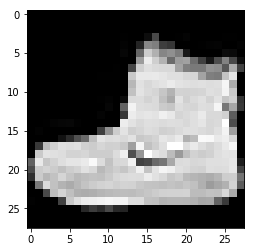

In [7]:
plt.imshow(np.array(train_x.iloc[0]).reshape((28,28)),cmap='gray')

In [8]:
## Create a dictionary of labels
label_dic={0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',
           7:'Sneaker',8:'Bag',9:'Ankle Boot'}

In [9]:
## Create numpy arrays for predictor matrix and labels
x=np.array(train_x)
y=keras.utils.to_categorical(np.array(train_y),10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
model=Sequential()

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [36]:
history=model.fit(x,y,epochs=10,batch_size=1000,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s - loss: 1.9742 - acc: 0.3511 - val_loss: 1.7558 - val_acc: 0.4898
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 1.6687 - acc: 0.5309 - val_loss: 1.5832 - val_acc: 0.5757
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 1.5297 - acc: 0.6045 - val_loss: 1.4571 - val_acc: 0.6488
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 1.4269 - acc: 0.6604 - val_loss: 1.3876 - val_acc: 0.6762
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 1.3594 - acc: 0.6827 - val_loss: 1.3237 - val_acc: 0.6978
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 1.3061 - acc: 0.6982 - val_loss: 1.2757 - val_acc: 0.7076
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 1.2583 - acc: 0.7104 - val_loss: 1.2332 - val_acc: 0.7162
Epoch 8/10
48000/48000 [==============================] - 2s 

In [37]:
p=model.predict(np.array(test_x.loc[8]).reshape(1,784))

In [38]:
np.argmax(p)

7

In [39]:
label_dic[7]

'Sneaker'

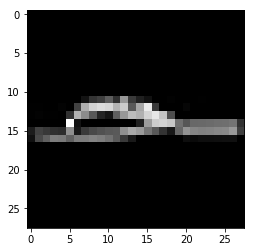

In [40]:
plt.imshow(np.array(test_x.loc[8]).reshape((28,28)),cmap='gray')

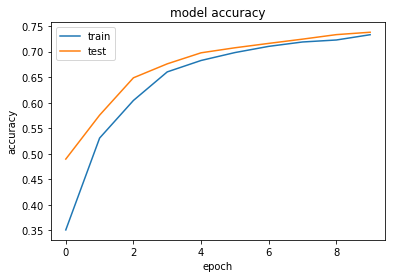

In [41]:
## Check for overfit
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

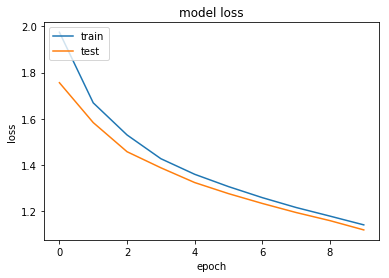

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()